In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings(action='ignore',category=FutureWarning)

### import dataset

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY


### Visculize the data

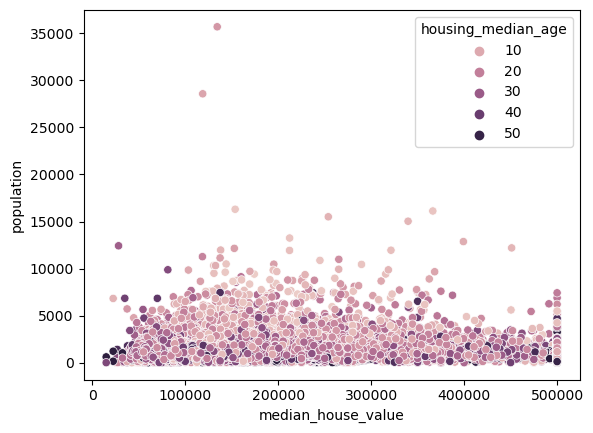

In [4]:
sns.scatterplot(x=df['median_house_value'],y=df['population'],hue=df['housing_median_age'])
plt.show()

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.quantile()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
Name: 0.5, dtype: float64

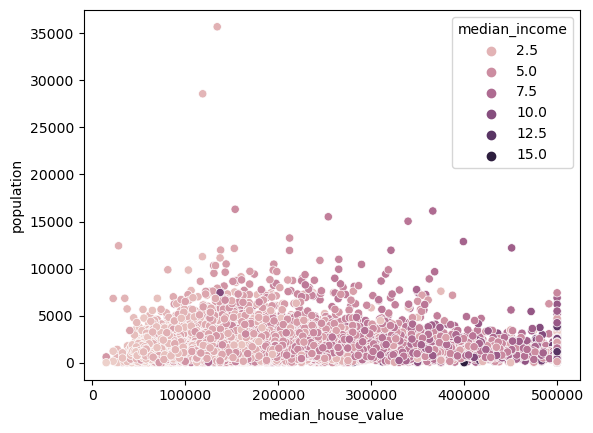

In [7]:
sns.scatterplot(x=df['median_house_value'],y=df['population'],hue=df['median_income'])
plt.show()

In [8]:
correlation_matrix = df.corr()

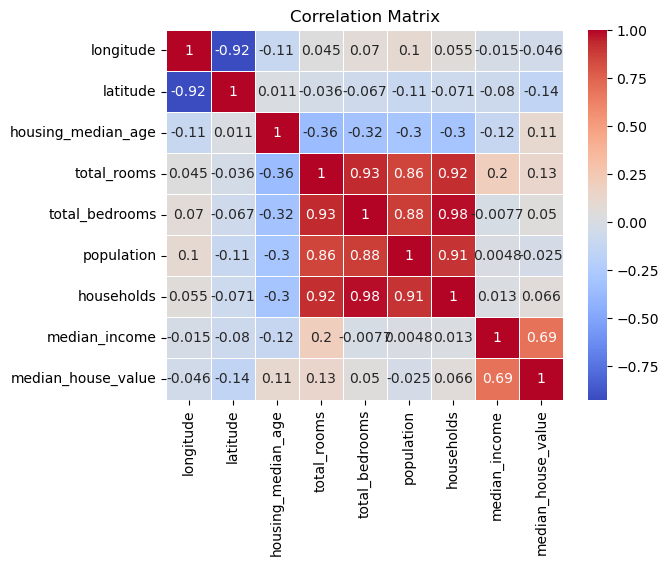

In [9]:
# Visualize correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


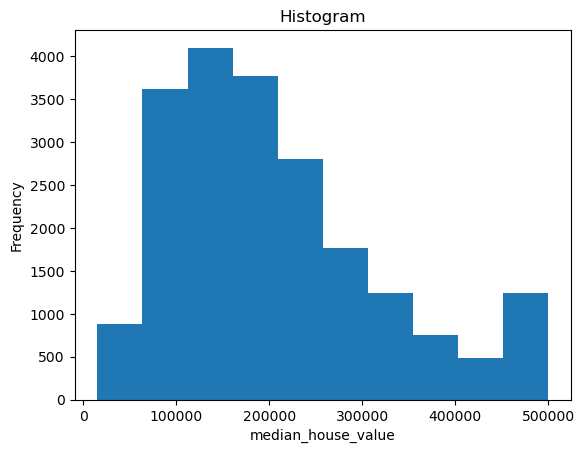

In [10]:
# Histogram for a single column
plt.hist(df['median_house_value'], bins=10)
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

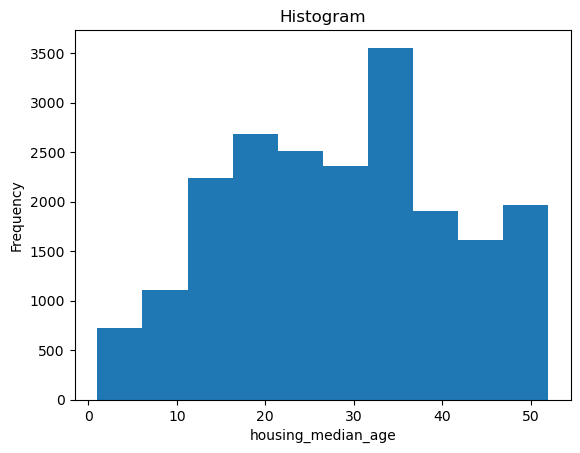

In [11]:
# Histogram for a single column
plt.hist(df['housing_median_age'], bins=10)
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

### Check missing values

<AxesSubplot:>

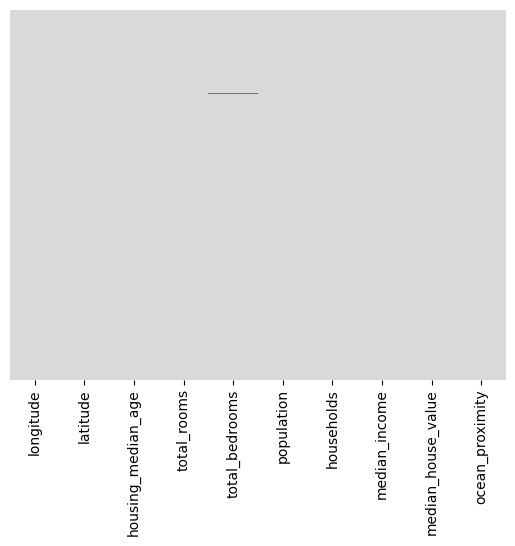

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')

In [13]:
df.shape

(20640, 10)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(20433, 10)

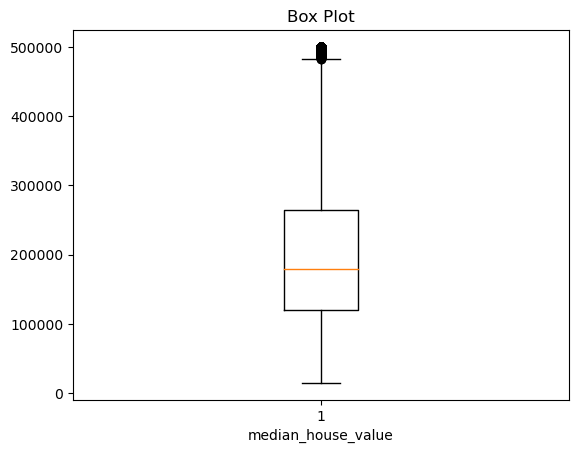

In [16]:
# Box plot for a single column
plt.boxplot(df['median_house_value'])
plt.xlabel('median_house_value')
plt.title('Box Plot')
plt.show()

In [17]:
correlation = df['median_house_value'].corr(df['median_income'])

In [18]:
correlation

0.6883554753161124

In [19]:
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY


In [20]:
correlation

0.6883554753161124

## Convert object into categorical data

In [21]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [22]:
df.select_dtypes(['category']).columns

Index(['ocean_proximity'], dtype='object')

In [23]:
ocean_proximity = pd.get_dummies(df['ocean_proximity'],drop_first=True)

In [24]:
df = pd.concat([df,ocean_proximity],axis=1)

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0,0,1,0


### Now there is no need of ocean proximity

In [26]:
df.drop('ocean_proximity',axis=1,inplace=True)

In [27]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0


## Now separate target variable

In [28]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [29]:
X.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0


# train test split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

### Train model

In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Take prediction

In [32]:
y_pred = model.predict(x_test)

### Accuracy

In [37]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = round(accuracy_score(y_test,y_pred)*100,2)

In [38]:
accuracy

5.04

In [39]:
y_pred

array([500001, 137500, 137500, ..., 500001, 500001, 137500], dtype=int64)

In [40]:
y_test

17497    276400
6787     192800
15315    184400
11213    153100
579      254900
          ...  
19427    175000
7863     206500
12265    140000
10465    381200
16003    313400
Name: median_house_value, Length: 4087, dtype: int64